**1. Dataset Selection**

link to dataset: https://www.kaggle.com/search?q=rain

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = 'all_weather_data.csv'
df = pd.read_csv(file_path)
df.describe()

,min_temp °c,max_temp °c,rain mm,humidity %,cloud_cover %,wind_speed km/h,wind_direction_numerical
count,2.836186e+06,2.836186e+06,2.836186e+06,2.836186e+06,2.836186e+06,2.836186e+06,2.836186e+06
mean,7.098229e+00,1.316484e+01,2.495048e+00,8.234143e+01,5.610476e+01,1.606967e+01,1.988212e+02
std,4.862686e+00,5.862976e+00,4.540619e+00,8.884271e+00,2.552428e+01,7.398712e+00,7.349957e+01
min,-2.800000e+01,-2.100000e+01,0.000000e+00,1.200000e+01,0.000000e+00,1.000000e+00,0.000000e+00
25%,4.000000e+00,9.000000e+00,0.000000e+00,7.700000e+01,3.700000e+01,1.100000e+01,1.575000e+02
50%,7.000000e+00,1.300000e+01,4.000000e-01,8.300000e+01,5.800000e+01,1.500000e+01,2.025000e+02
75%,1.100000e+01,1.700000e+01,3.100000e+00,8.900000e+01,7.600000e+01,2.000000e+01,2.475000e+02
max,3.100000e+01,4.300000e+01,1.535000e+02,1.000000e+02,1.000000e+02,6.600000e+01,3.375000e+02


**2. Data analysis**

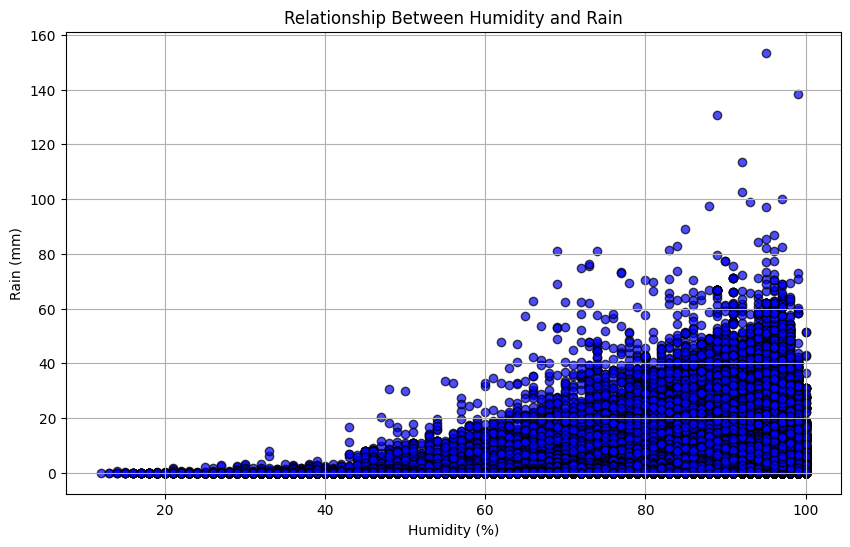

In [11]:
# Ensure humidity and rain are numeric
df['humidity %'] = pd.to_numeric(df['humidity %'], errors='coerce')
df['rain mm'] = pd.to_numeric(df['rain mm'], errors='coerce')

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['humidity %'], df['rain mm'], color='blue', alpha=0.7, edgecolor='k')

# Add titles and labels
plt.title('Relationship Between Humidity and Rain')
plt.xlabel('Humidity (%)')
plt.ylabel('Rain (mm)')

# Add a grid for better visualization
plt.grid(True)

# Show the plot
plt.show()

A graph can reveal whether there is a strong relationship (positive, negative, or none) between humidity and rainfall.
High humidity is often associated with precipitation, so understanding this relationship visually can confirm whether humidity is a good predictor for rain.
In addition, Outliers can significantly skew predictions. A graph can help you spot cases where, for instance, very low or very high humidity values are associated with unexpected rainfall amounts.


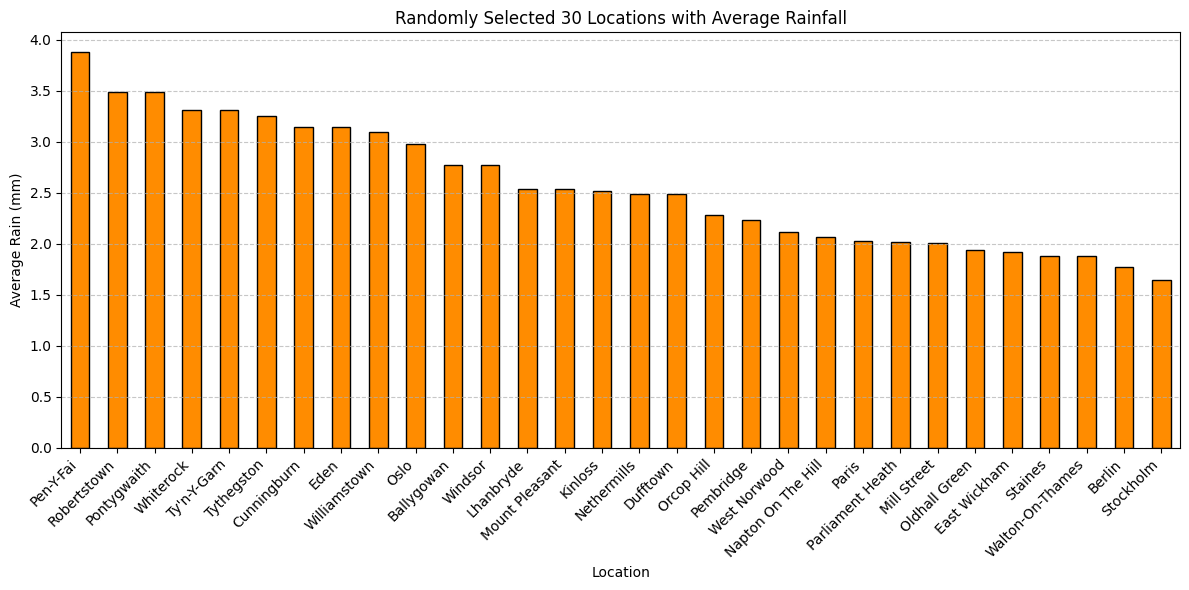

In [13]:
# Ensure 'rain' column is numeric
df['rain'] = pd.to_numeric(df['rain mm'], errors='coerce')

# Group data by location and calculate the average rain
avg_rain_by_location = df.groupby('location')['rain mm'].mean()

# Randomly sample 30 locations
random_30_locations = avg_rain_by_location.sample(n=30, random_state=42)  # Set random_state for reproducibility

random_30_locations = random_30_locations.sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
random_30_locations.plot(kind='bar', color='darkorange', edgecolor='black')

# Add titles and labels
plt.title('Randomly Selected 30 Locations with Average Rainfall')
plt.xlabel('Location')
plt.ylabel('Average Rain (mm)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

Rainfall can vary significantly across different locations due to geographic, climatic, and environmental factors.

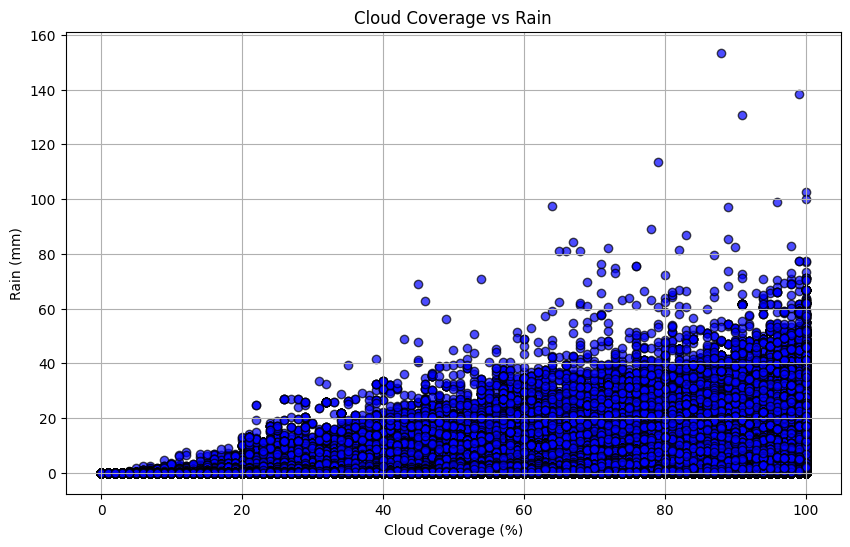

In [15]:
# Ensure the columns are numeric
df['cloud_cover %'] = pd.to_numeric(df['cloud_cover %'], errors='coerce')
df['rain mm'] = pd.to_numeric(df['rain mm'], errors='coerce')

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['cloud_cover %'], df['rain mm'], alpha=0.7, edgecolor='k', color='blue')

# Add titles and labels
plt.title('Cloud Coverage vs Rain')
plt.xlabel('Cloud Coverage (%)')
plt.ylabel('Rain (mm)')

# Add grid for better visualization
plt.grid(True)

# Show the plot
plt.show()

Cloud coverage is a direct indicator of potential rainfall, as clouds are responsible for precipitation.


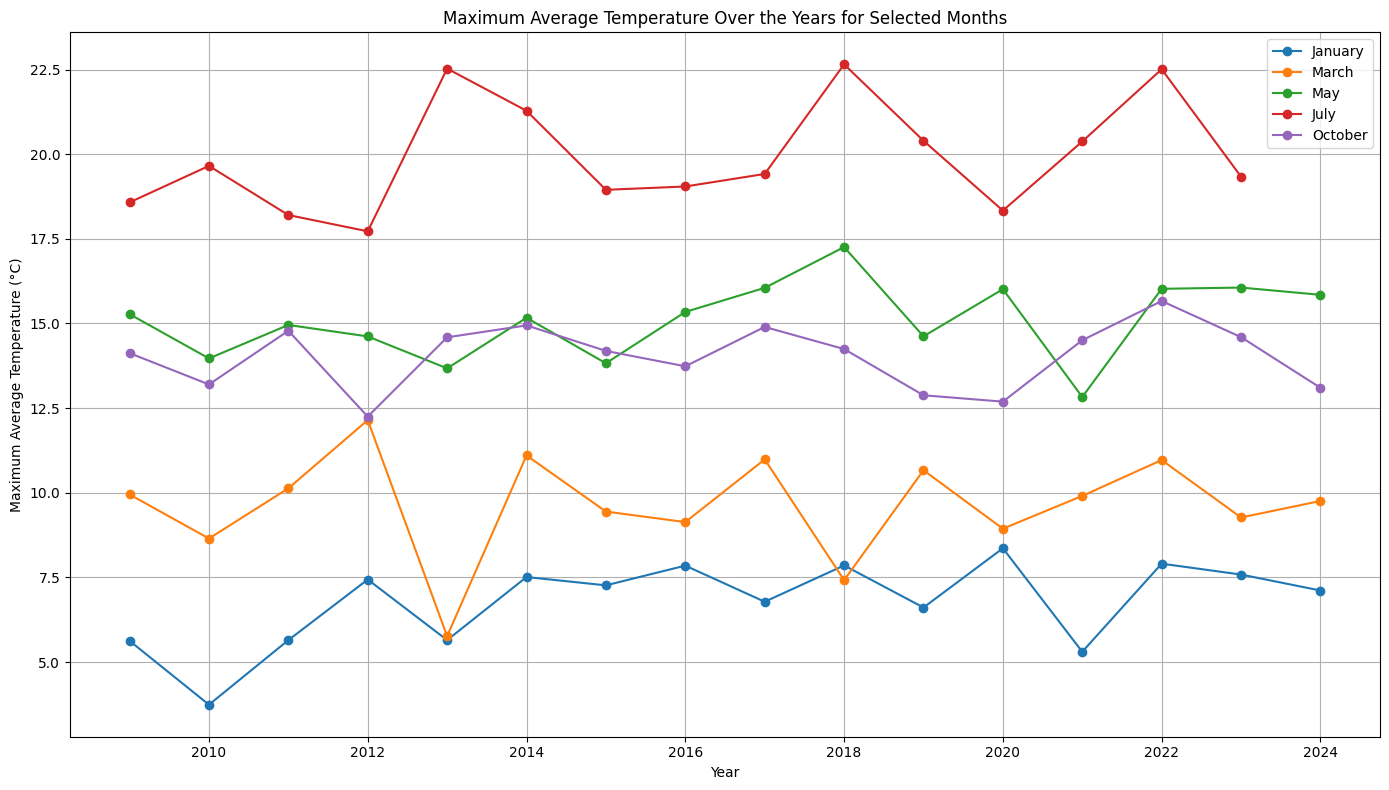

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'max_temp' and 'date' are in the correct format without modifying the original df
df['max_temp °c'] = pd.to_numeric(df['max_temp °c'], errors='coerce')
df['date'] = pd.to_datetime(df['date'])

# Define the 5 months to plot (e.g., January, March, May, July, and October)
months_to_plot = [1, 3, 5, 7, 10]  # Jan, Mar, May, Jul, Oct
month_names = {1: 'January', 3: 'March', 5: 'May', 7: 'July', 10: 'October'}  # Mapping for legend

# Initialize the plot
plt.figure(figsize=(14, 8))

# Loop through the selected months
for month in months_to_plot:
    # Filter the data for the current month and extract year and month from 'date'
    month_df = df[df['date'].dt.month == month]

    # Group by year and calculate the average max temperature for the month
    avg_temp_by_year = month_df.groupby(month_df['date'].dt.year)['max_temp °c'].mean()

    # Plot the data for the current month with a unique style
    plt.plot(avg_temp_by_year.index, avg_temp_by_year.values, marker='o', label=f'{month_names[month]}')

# Add titles and labels
plt.title('Maximum Average Temperature Over the Years for Selected Months')
plt.xlabel('Year')
plt.ylabel('Maximum Average Temperature (°C)')

# Add a legend to distinguish months
plt.legend()

# Add grid for better visualization
plt.grid(True)

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()




1. Identifying Long-Term Temperature Trends
The graph helps reveal whether temperatures are increasing, decreasing, or remaining stable over the years for the selected months.
This can provide insights into climate change effects, such as global warming, and how they are manifesting in specific months of the year.
2. Comparing Temperature Variability Across Months
By focusing on selected months, you can directly compare how temperatures differ during different parts of the year.
3. Different months often represent different seasons, and visualizing their temperature differences can help determine whether specific months are becoming hotter or colder over time.

In [26]:
numeric_df = df.select_dtypes(include=['number'])
df_corr = numeric_df.corr(method="pearson").loc[["rain mm"]]

<Axes: >

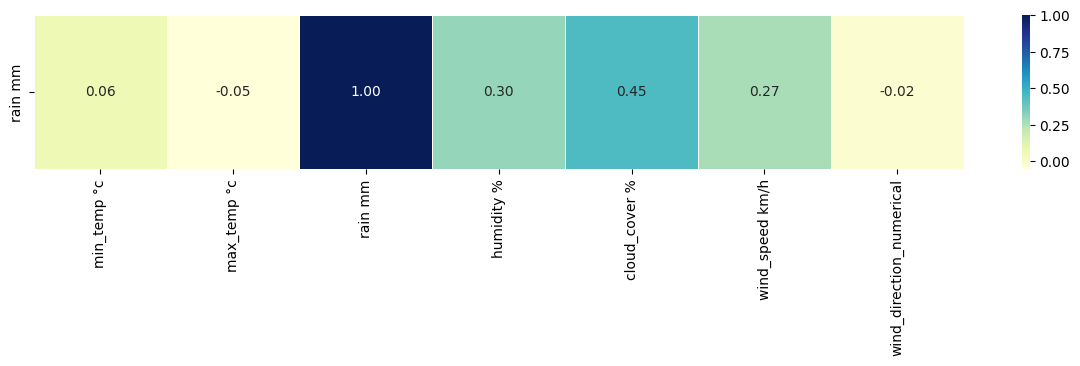

In [27]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,2))
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, ax=ax)

It is important to see the correlation so we can tell which columns are related to rainfall

**Using label encoder to change 'location' to numerical values**

In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'City' column
df['location_encoded'] = label_encoder.fit_transform(df['location'])


**Convert dates to the number of days since a reference date**

In [29]:
# Convert to datetime
df['date'] = pd.to_datetime(df['date'])

reference_date = pd.to_datetime('2009-01-01')

# Calculate the difference in days
df['date_in_days'] = (df['date'] - reference_date).dt.days



**3.** **Basic Model Pipeline**

In [30]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [31]:
# Features (X) and Target (y)
X = df.drop(columns=['rain mm', 'location', 'date', 'wind_direction'])
y = df['rain mm']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the XGBRegressor model with 'gblinear' booster for linear regression
model = xgb.XGBRegressor(objective='reg:squarederror', booster='gblinear', eval_metric='rmse')

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

**4. Error analysis**

## **1. Identify Where the Model Performs the Worst and the Best**

In [ ]:
# Calculate residuals (actual - predicted)
residuals = y_test - y_pred

# Add residuals to the DataFrame for analysis
error_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Residual': residuals
})

# Sort by the absolute value of residuals (to see largest errors)
error_df['Abs_Residual'] = error_df['Residual'].abs()
error_df_sorted = error_df.sort_values(by='Abs_Residual', ascending=False)

# Print the top 40 largest errors
print("Top 40 largest errors (worst performance):")
print(error_df_sorted.head(40))

# Print the top 40 smallest errors (best performance)
print("\nTop 40 smallest errors (best performance):")
print(error_df_sorted.tail(40))

Top 40 largest errors (worst performance):
         Actual  Predicted    Residual  Abs_Residual
1979562   138.3   5.617013  132.682987    132.682987
2332880    82.5   5.088942   77.411058     77.411058
2030331    82.7   8.665752   74.034248     74.034248
2604879    77.3   7.257976   70.042024     70.042024
1366079    73.0   5.927960   67.072040     67.072040
2795485    64.8   5.378108   59.421892     59.421892
120890     64.2   5.048236   59.151764     59.151764
1169297    63.7   4.623443   59.076557     59.076557
1358211    63.0   4.011950   58.988050     58.988050
2604583    66.6   7.665518   58.934482     58.934482
2604808    66.6   7.665630   58.934370     58.934370
2604910    66.6   7.671574   58.928426     58.928426
2604758    66.6   7.672583   58.927417     58.927417
2604534    66.6   7.689853   58.910147     58.910147
2604897    66.6   7.707236   58.892764     58.892764
2604581    66.6   7.712955   58.887045     58.887045
2604856    66.6   7.713852   58.886148     58.886148
260

The worst performance occurs on data points with large residuals (i.e., the difference between the actual and predicted values).

 On the other hand, the best performance is characterized by residuals close to zero, where the predicted values are very close to the actual values.


 The model may be underestimating higher values due to biases or limitations in its ability to predict large magnitudes. Additionally, certain features could be negatively impacting predictions, either due to improper scaling, irrelevant features, or complex interactions that the model is not capturing effectively.




## **2. Determine If the Model Is Overestimating or Underestimating**

In [ ]:
# Calculate the mean of residuals
mean_residual = residuals.mean()

if mean_residual > 0:
    print(f"Model is underestimating by an average of {mean_residual} units.")
else:
    print(f"Model is overestimating by an average of {abs(mean_residual)} units.")


Model is overestimating by an average of 0.025903817261181288 units.


The model is slightly overestimating on average, with a bias of 0.0259 units. However, based on our earlier error analysis where many of the largest errors showed significant underestimation (e.g., large actual values with much smaller predicted values), the model may primarily be underestimating, especially in cases with higher values.

This slight average overestimation might be influenced by the model's overall tendency to make smaller errors for lower values (where it might predict more accurately), while it struggles with larger values, resulting in a mix of small overestimations and larger underestimations. Thus, while the average error is positive, the model's performance might still be considered as underestimating for certain higher values.

## **3.  features sabotaging the model**

The "location" feature, encoded using label encoding, might be sabotaging the model by introducing an artificial ordinal relationship between categories, which the model could misinterpret. This can lead to overfitting, underfitting, or poor generalization. A better approach would be to use one-hot encoding or target encoding, or to engineer more meaningful location-related features.

Representing dates as just the number of days since a reference date can lose important seasonal patterns, such as temperature or rainfall variations across months or seasons. The model might fail to recognize these cyclical trends because the day count does not capture the periodic nature of weather patterns.

## **4. Common Patterns in Erroneous Samples**

Common Patterns in Erroneous Samples:
Upon inspection, the erroneous samples tend to:

Be cases with larger actual values.
Show significant underestimation, which is causing the residuals to be large.